# 인공신경망_분류

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings(action='ignore')

In [61]:
# 유니코드 깨짐현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams['font.family']='NanumGothic'

## 데이터 구성하기

In [62]:
df_raw=pd.read_csv("/home/piai/Big Data/2. Big Data 분석/유방암.csv", encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


### 데이터 개수 확인

In [63]:
df_raw.shape

(320, 31)

변수 : 31개, 자료수 320개 

### 데이터 타입 확인

In [64]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

목표변수 diagnosis는 범주형 변수이므로 object type
그 외로는 모두 연속형 변수이므로 float64 type 확인

### 결측치 처리

In [65]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

결측치 없음. 그대로 진행

### 기술 통계량 확인

In [66]:
df_raw.describe().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,...,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000
mean,15.710,20.323,103.050,807.736,0.099,0.123,0.122,0.067,0.187,0.063,...,18.542,27.226,123.222,1133.463,0.138,0.309,0.353,0.145,0.305,0.087
std,3.746,4.151,25.836,391.969,0.014,0.057,0.085,0.042,0.027,0.007,...,5.182,6.050,35.960,640.980,0.023,0.175,0.214,0.067,0.069,0.020
min,7.691,9.710,47.920,170.400,0.053,0.027,0.000,0.000,0.127,0.050,...,8.678,12.020,54.490,223.600,0.086,0.050,0.000,0.000,0.156,0.055
25%,13.050,17.460,84.845,523.900,0.090,0.081,0.053,0.030,0.167,0.057,...,14.657,23.275,95.525,653.525,0.123,0.180,0.183,0.091,0.259,0.073
50%,15.125,20.215,100.100,713.050,0.099,0.115,0.111,0.065,0.185,0.061,...,17.730,26.880,118.850,969.200,0.138,0.277,0.340,0.153,0.296,0.083
75%,18.520,22.500,121.550,1075.250,0.108,0.156,0.170,0.092,0.203,0.067,...,22.420,30.938,148.850,1538.500,0.151,0.406,0.484,0.197,0.328,0.098
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.170,0.291,0.664,0.208


### 목표변수(diagnosis), 설명변수 데이터 구성

In [67]:
# 설명변수
df_raw_x=df_raw.drop('diagnosis', axis=1) 
# 목표변수 (diagnosis)
df_raw_y=df_raw['diagnosis']

In [68]:
df_raw_y.head()

0    음성
1    양성
2    음성
3    양성
4    양성
Name: diagnosis, dtype: object

In [69]:
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


### Scale 변환

In [70]:
v_feature_name=df_raw_x.columns
# Standard Scaler 적용해서 변환
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


### 데이터 분할 train(0.6) : test(0.4)

In [71]:
df_scaled_train_x, df_scaled_test_x=train_test_split(df_scaled, test_size=0.4)
df_train_y, df_test_y=train_test_split(df_raw_y, test_size=0.4)
print("train data : ", df_scaled_train_x.shape)
print("test data : ", df_scaled_test_x.shape)

train data :  (192, 30)
test data :  (128, 30)


train data 총 192개, test data 총 128개로 구성됨

### 목표변수 확인

In [72]:
df_raw_y.value_counts()

음성    212
양성    108
Name: diagnosis, dtype: int64

 목표변수 전체에서 음성은 212개, 양성은 108개로 확인

In [73]:
df_test_y.value_counts()

음성    81
양성    47
Name: diagnosis, dtype: int64

목표변수 test data 중 음성은 81개, 양성은 47개 결과 확인

## 인공신경망 모델 생성

### 기본 옵션으로 모델 생성

In [74]:
nn=MLPClassifier()
nn.fit(df_scaled_train_x, df_train_y)

MLPClassifier()

In [75]:
print("Accuracy on training set : {:.3f}".format(nn.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(nn.score(df_scaled_test_x, df_test_y)))

Accuracy on training set : 0.844
Accuracy on test set : 0.570


기본 옵션으로 인공신경망 모델 생성시, 모델 정확도는 train 84.4%, test 57%로 모델은 train data에 과대적합

## 모델 Parameter 조정

### Hidden Layer : 은닉층 변경에 따른 모델 성능

In [76]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
para_hidden=[5*hidden for hidden in range(1,21)]

for v_hidden in para_hidden :
    nn=MLPClassifier(hidden_layer_sizes=(v_hidden, v_hidden))
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_hidden=pd.DataFrame()
df_accuracy_hidden['HiddenLayer']=para_hidden
df_accuracy_hidden['Train Accuracy']=train_accuracy
df_accuracy_hidden['Test Accuracy']=test_accuracy

In [77]:
# 모델 정확도 확인
df_accuracy_hidden.round(3)

,HiddenLayer,Train Accuracy,Test Accuracy
0,5,0.734,0.531
1,10,0.760,0.609
2,15,0.734,0.562
3,20,0.849,0.578
4,25,0.839,0.562
5,30,0.901,0.578
6,35,0.958,0.562
7,40,0.938,0.555
8,45,0.958,0.547
9,50,0.990,0.562


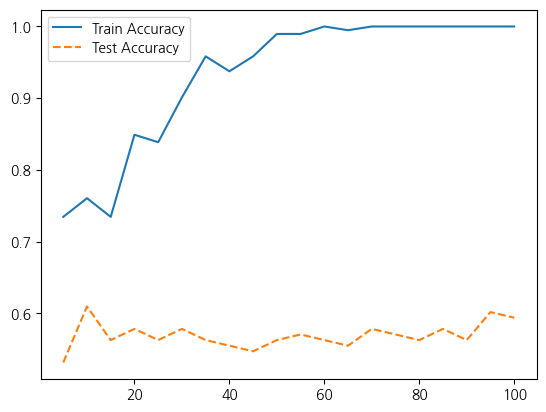

In [78]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

v_hidden 값이 증가할수록 train data는 과적합 경향을 보임.

과적합을 최대한 방지하고 test data 성능을 향상시키기 위해 (30,30)로 선정

### Activation : 활성화 함수에 따른 모델 성능

In [79]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# activation 변경
para_function=["logistic", "tanh", "relu"]

for v_function in para_function :
    nn=MLPClassifier(activation=v_function, hidden_layer_sizes=(30,30))
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
    
# 데이터 테이블로 저장
df_accuracy_function=pd.DataFrame()
df_accuracy_function['ActivationFunction']=para_function
df_accuracy_function['Train Accuracy']=train_accuracy
df_accuracy_function['Test Accuracy']=test_accuracy

In [80]:
# 모델 정확도 확인
df_accuracy_function.round(3)

,ActivationFunction,Train Accuracy,Test Accuracy
0,logistic,0.682,0.633
1,tanh,0.943,0.516
2,relu,0.870,0.562


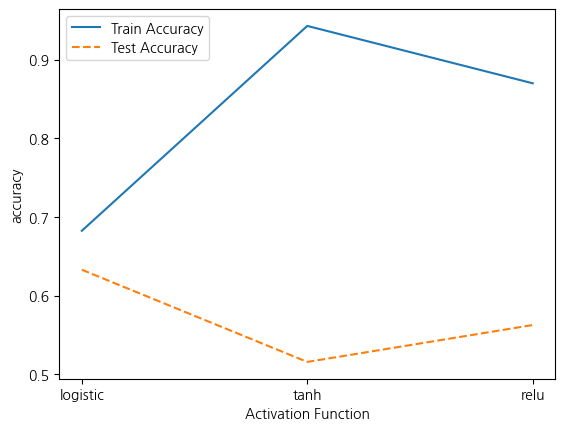

In [81]:
# 모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Activation Function')
plt.legend()

logistic 함수는 test data에서 성능이 떨어지는 반면 test data에서 가장 좋은 성능을 보인다. tanh 함수는 test data는 과적합 경향을 보이지만, test data의 성능이 가장 좋지 않으며 relu 함수 역시 test data에 과적합 경향을 보이지만 test data의 성능은 logistic 함수보다 떨어진다. 따라서 activation 함수로 logistic을 선정한다.

### Solver : 가중치 최적화 변경에 따른 모델 성능

In [83]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# solver 변경
para_solver=['lbfgs', 'sgd', 'adam']

for v_solver in para_solver : 
    nn=MLPClassifier(solver=v_solver, activation='logistic', hidden_layer_sizes=(30,30))
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_solver=pd.DataFrame()
df_accuracy_solver['Solver']=para_solver
df_accuracy_solver['Train Accuracy']=train_accuracy
df_accuracy_solver['Test Accuracy']=test_accuracy

In [84]:
# 모델 정확도 확인
df_accuracy_solver.round(3)

,Solver,Train Accuracy,Test Accuracy
0,lbfgs,1.000,0.500
1,sgd,0.682,0.633
2,adam,0.682,0.633


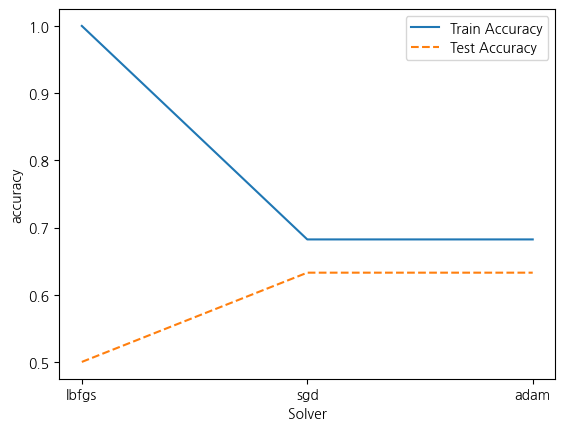

In [85]:
# 모델 정확도 그래프 확인
plt.plot(para_solver, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_solver, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Solver')
plt.legend()

'lbfgs'는 train data에서 과적합 경향을 보이지만 test data에서는 성능이 좋지 않음. 'sgd'와 'adam'은 test data에서는 성능이 동일하므로 임의로 'adam' 선택

### Mini Batch : 변경에 따른 모델 성능

In [86]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# Mini Batch
para_batch=[20*batch for batch in range(1,10)]

for v_batch in para_batch : 
    nn=MLPClassifier(batch_size=v_batch, solver='adam', activation='logistic', hidden_layer_sizes=(30,30))
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_batch=pd.DataFrame()
df_accuracy_batch['Mini Batch']=para_batch
df_accuracy_batch['Train Accuracy']=train_accuracy
df_accuracy_batch['Test Accuracy']=test_accuracy

In [87]:
# 모델 정확도 확인
df_accuracy_batch.round(3)

,Mini Batch,Train Accuracy,Test Accuracy
0,20,0.714,0.578
1,40,0.719,0.586
2,60,0.703,0.602
3,80,0.698,0.594
4,100,0.693,0.609
5,120,0.693,0.594
6,140,0.688,0.633
7,160,0.688,0.625
8,180,0.682,0.633


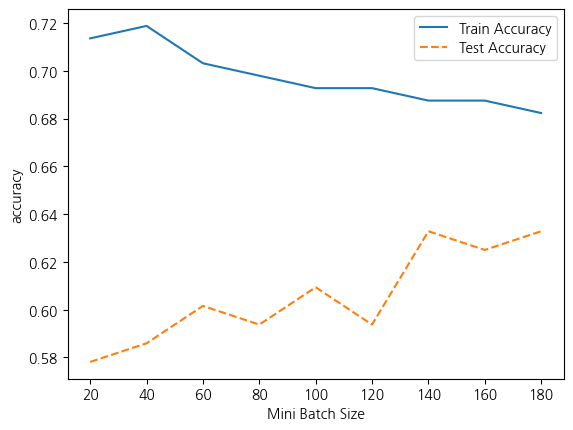

In [88]:
# 모델 정확도 그래프 확인
plt.plot(para_batch, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_batch, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Mini Batch Size')
plt.legend()

Mini Batch Size가 증가할수록 train data의 성능은 감소하는 반면 test data의 성능은 전반적으로 증가하는 추세를 보임. 따라서 최종적으로 mini batch size 140으로 결정

## 최종 모델

In [154]:
nn=MLPClassifier(batch_size=140, solver='adam', activation='logistic', hidden_layer_sizes=(30,30))
nn.fit(df_scaled_train_x, df_train_y)

MLPClassifier(activation='logistic', batch_size=140,
              hidden_layer_sizes=(30, 30))

### 최종 모델 성능 평가

In [90]:
# 모델 정확도
print("Train Data Accuracy :", nn.score(df_scaled_train_x, df_train_y).round(3))
print("Test Data Accuracy :", nn.score(df_scaled_test_x, df_test_y).round(3))

Train Data Accuracy : 0.682
Test Data Accuracy : 0.625


최종 모델은 train data에서 68.2%의 정확도를 보이며, test data에서는 62.5%의 정확도를 보인다. 따라서 train data의 성능은 조금 감소하였지만 test data의 성능을 향상시켰다. train data와 test data간의 accuracy gap이 6%에 불과하므로 과대적합 문제를 해결하였다.

### 최종 모델을 이용한 분류 예측

In [91]:
# 목표범수 예측
y_pred=nn.predict(df_scaled_test_x)

# Confusion matrix
print("Confusion Matrix :\n{}".format(confusion_matrix(df_test_y, y_pred)))

Confusion Matrix :
[[ 2 45]
 [ 3 78]]


[Confusion Matrix]
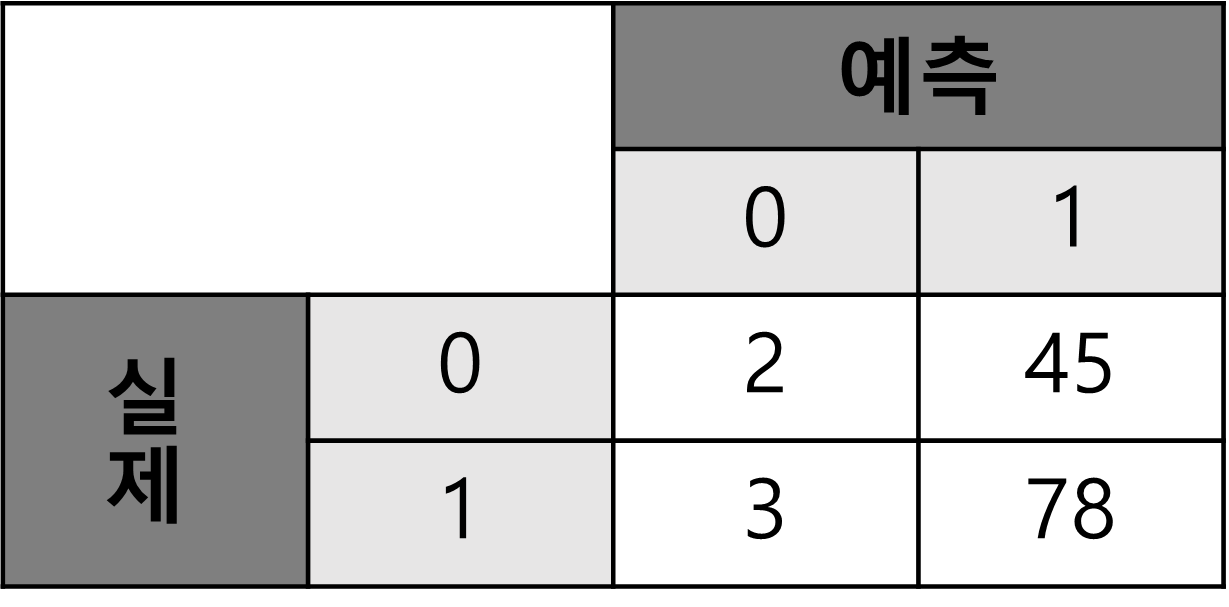

이 때, 0은 양성 data, 1은 음성 data를 의미함

In [93]:
print(classification_report(df_test_y, y_pred, digits=3))

              precision    recall  f1-score   support

          양성      0.400     0.043     0.077        47
          음성      0.634     0.963     0.765        81

    accuracy                          0.625       128
   macro avg      0.517     0.503     0.421       128
weighted avg      0.548     0.625     0.512       128



인공신경망 모델 최종 결과, train data의 성능은 68.2%, test data의 성능은 62.5%이다.

classification report로 분석한 결과 음성이 나올 정밀도는 63.4%, 재현율은 96.3%, f1점수는 0.765이다. 따라서 실제로 음성인 결과를 양성으로 오분류하는 확률은 적었지만, 실제로 양성인 결과를 음성으로 오분류하는 확률은 높았다. 따라서 데이터를 좀 더 확보 후 양성 데이터를 정확히 구별할 수 있도록 모델 개선이 필요해보인다. 

# KNN 분석

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [95]:
import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams['font.family']='NanumGothic'

## 데이터 구성하기

In [96]:
df_raw=pd.read_csv("/home/piai/Big Data/2. Big Data 분석/유방암.csv", encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


이 외 결측치 확인 및 기술통계량 확인 등은 위의 과정에서 진행했으므로 생략

### 목표변수(diagnosis), 설명변수 데이터 구성

In [97]:
# 설명변수
df_raw_x=df_raw.drop('diagnosis', axis=1) 
# 목표변수 (diagnosis)
df_raw_y=df_raw['diagnosis']

### 데이터 분할 train(0.6) : test(0.4)

In [100]:
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x, df_raw_y, test_size=0.4)

In [101]:
df_train_x.shape

(192, 30)

In [103]:
df_test_x.shape

(128, 30)

In [106]:
df_raw_y.value_counts()

음성    212
양성    108
Name: diagnosis, dtype: int64

In [105]:
df_test_y.value_counts()

음성    84
양성    44
Name: diagnosis, dtype: int64

train data 총 192개, test data 총 128개로 구성됨

목표변수 전체에서 음성은 212개, 양성은 108개로 확인

목표변수 test data 중 음성은 84개, 양성은 44개 결과 확인

## KNN모델 생성

### 기본 옵션으로 모델 생성

In [107]:
knn_uncustomized=KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

KNeighborsClassifier()

In [109]:
print("Accuracy on training set : {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.911
Accuracy on test set : 0.930


기본 옵션으로 KNN 모델 생성시, 모델 정확도는 train 91.1%, test 93%로 과소적합 현상이 나타남.

## 이웃 수 증가에 따른 정확도 변화

In [139]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# 이웃 수 : 3~30
para_n_neighbors=[i for i in range (3,31)]

for v_n_neighbors in para_n_neighbors :
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_neighbors=pd.DataFrame()
df_accuracy_neighbors['Neighbors']=para_n_neighbors
df_accuracy_neighbors['Train Accuracy']=train_accuracy
df_accuracy_neighbors['Test Accuracy']=test_accuracy

In [140]:
# 모델 정확도 확인
df_accuracy_neighbors.round(3)

,Neighbors,Train Accuracy,Test Accuracy
0,3,0.922,0.945
1,4,0.911,0.930
2,5,0.911,0.930
3,6,0.911,0.922
4,7,0.917,0.938
5,8,0.906,0.945
6,9,0.901,0.938
7,10,0.906,0.945
8,11,0.896,0.938
9,12,0.906,0.945


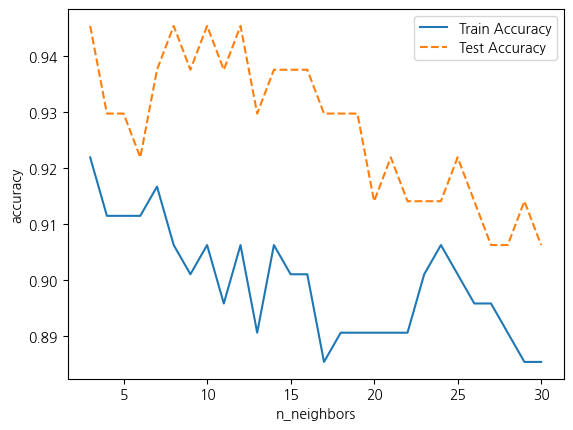

In [141]:
# 모델 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_neighbors, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('n_neighbors'); plt.ylabel('accuracy')
plt.legend()

k(이웃 수)가 3~30까지 변화할 때 정확도 변호 그래프. 
이웃 수 증가하면서 과소적합 형태가 두드러지게 나타남. 따라서 과소적합을 최대한 방지하기 위해 train data의 성능이 가장 높은 7로 선정.

## 최종 모델

In [153]:
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(df_train_x, df_train_y)

KNeighborsClassifier(n_neighbors=7)

### 최종 모델 성능 평가

In [149]:
# 모델 정확도
print("Train Data Accuracy :", knn_model.score(df_train_x, df_train_y).round(3))
print("Test Data Accuracy :", knn_model.score(df_test_x, df_test_y).round(3))

Train Data Accuracy : 0.917
Test Data Accuracy : 0.938


최종 모델은 train data에서 91.7%의 정확도를 보이며, test data에서는 93.8%의 정확도를 보인다. 
처음 성능보다 조금 나아졌지만 여전히 과소적합의 경향을 보인다. 

### 최종 모델을 이용한 분류 예측

In [150]:
# 목표범수 예측
y_pred=knn_model.predict(df_test_x)

# Confusion matrix
print("Confusion Matrix :\n{}".format(confusion_matrix(df_test_y, y_pred)))

Confusion Matrix :
[[42  2]
 [ 6 78]]


[Confusion Matrix]
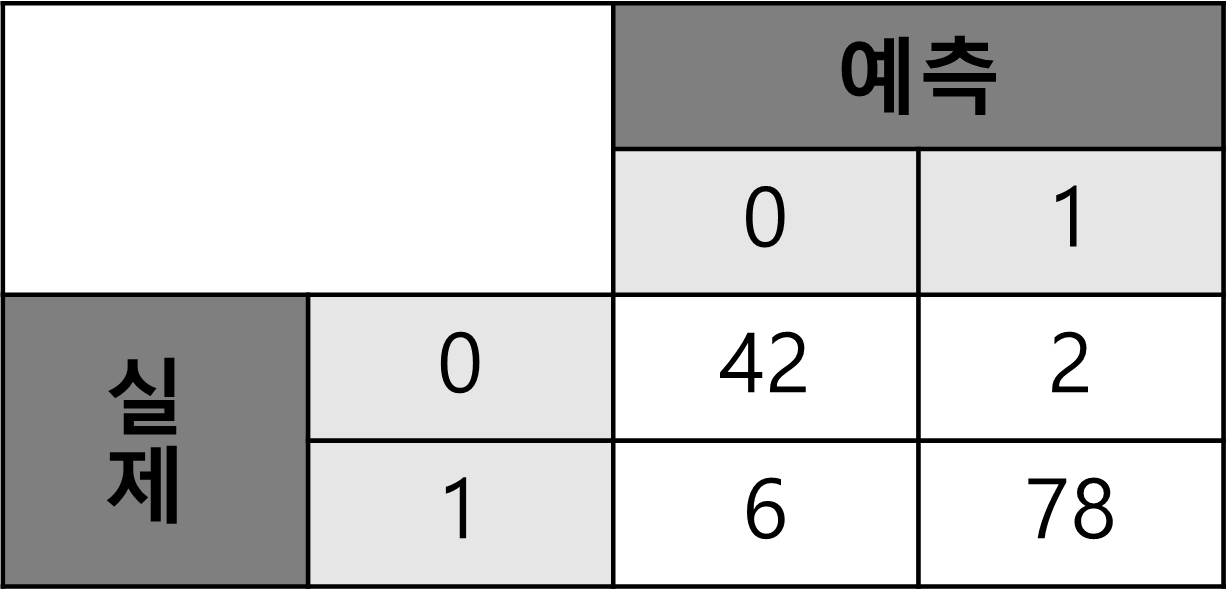

이 때, 0은 양성 data, 1은 음성 data를 의미함

In [152]:
# 실제값과의 차이 
print(classification_report(df_test_y, y_pred, digits=3))

              precision    recall  f1-score   support

          양성      0.875     0.955     0.913        44
          음성      0.975     0.929     0.951        84

    accuracy                          0.938       128
   macro avg      0.925     0.942     0.932       128
weighted avg      0.941     0.938     0.938       128



KNN 모델 분석 결과, train data는 최종 성능 91.7%, test data는 최종 성능 93.8%로 과소적합의 문제를 해결하지 못했다. confusion matrix는 위와 같으며
classification report 결과 양성 음성 precision, recall, f1-score 수치 모두 높은 편으로 모델 자체의 성능은 나쁘지 않은 것으로 판단된다.
그러나 음성을 양성으로 판단하고 양성을 음성으로 판단하는 것은 치명적이며, 이렇게 판단되는 수치가 전체 중에 대략 6%로 모델 개선은 필요해보인다. 

# End